# 목적
- 텐서플로우 기본 사용법을 익힌다.

In [0]:
import tensorflow as tf
%tensorflow_version 1.x

# 기본 틀
- 그래프
- 연산(계산) 처리

In [0]:
# A. 관계 기술 -> 그래프 -> 플로우(흐름)을 구성
hello = tf.constant('hello DL :)')    # 상수
hello

<tf.Tensor 'Const:0' shape=() dtype=string>

In [0]:
# B. 구동
# 1. 세션을 구한다.(오픈한다.)
sess = tf.Session()

# 2. 데이터를 주입하여 연산(계산)
print(sess.run(hello))

# 3. 세션을 닫는다.
sess.close()

b'hello DL :)'


In [0]:
# I/O 처리 시 close()를 누락할 수도 있어서, with 문으로 처리
with tf.Session() as sess:
    print(sess.run(hello))

b'hello DL :)'


# 텐서플로우를 이용한 간단한 연산(계산)

In [0]:
# 1. 플로우 구성
# 상수 정의(define)
a = tf.constant(123)
b = tf.constant(500)
a, b

(<tf.Tensor 'Const_1:0' shape=() dtype=int32>,
 <tf.Tensor 'Const_2:0' shape=() dtype=int32>)

In [0]:
# 계산 정의(실제 수행은 안하고, 더한다는 형태만 가진다.)
add_op = a + b
add_op

<tf.Tensor 'add:0' shape=() dtype=int32>

In [0]:
# 실제 연산 처리, 구동
with tf.Session() as sess:
    res = sess.run(add_op)
    print(res, type(res))

623 <class 'numpy.int32'>


# 텐서플로우의 자료구조 텐서의 종류

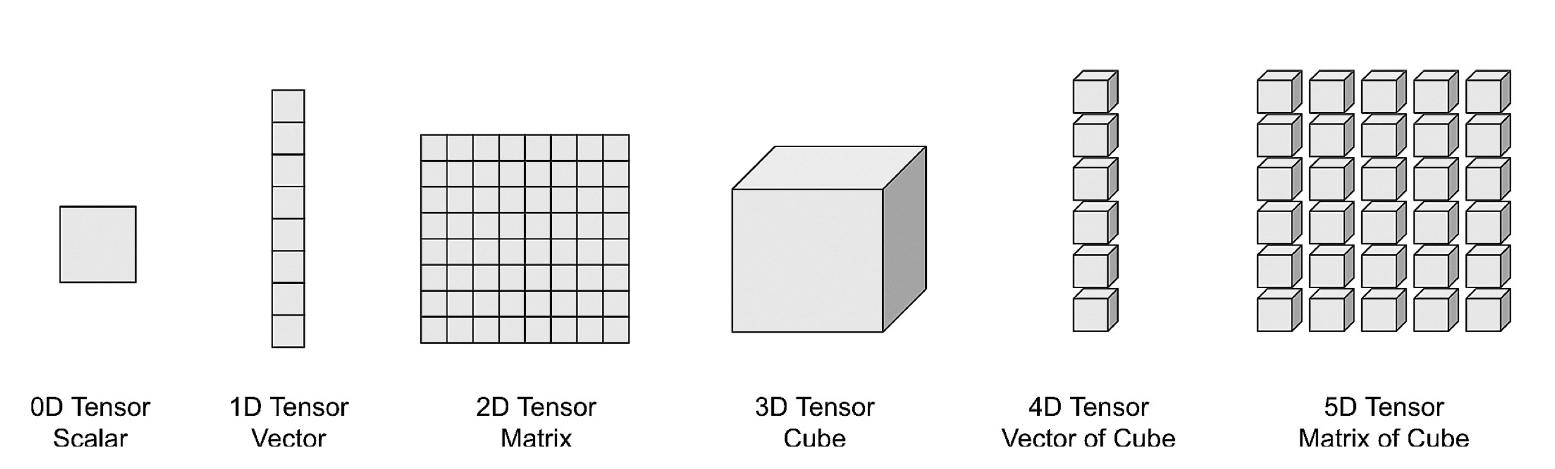

In [0]:
from IPython.display import Image
Image('/content/8.tensor.jpeg', width=700)

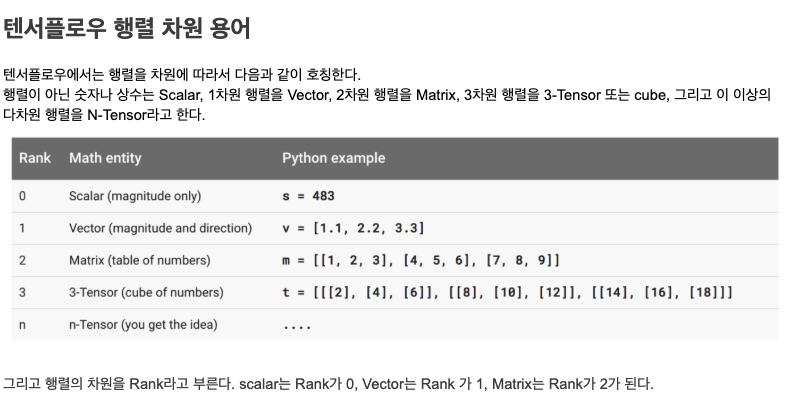

In [0]:
Image('/content/텐서용어.png', width=700)

# 텐서플로우의 기본 항목 사용
- 핵심 데이터 구조 요소
  - 상수 : Constant
  - 변수 : Variable
  - 플레이스홀더 : Placeholder

In [0]:
# 상수 정의
a = tf.constant(100, name='a')
b = tf.constant(110, name='b')
c = tf.constant(120, name='c')
a, b, c

(<tf.Tensor 'a:0' shape=() dtype=int32>,
 <tf.Tensor 'b:0' shape=() dtype=int32>,
 <tf.Tensor 'c:0' shape=() dtype=int32>)

In [0]:
# 변수 정의
v = tf.Variable(0, name='v')
v, v.name

(<tf.Variable 'v:0' shape=() dtype=int32_ref>, 'v:0')

In [0]:
# 연산식 정의 : 데이터 플로우 그래프의 정의
calc_op = a + b + c
calc_op

<tf.Tensor 'add_2:0' shape=() dtype=int32>

In [0]:
# 데이터 플로우 그래프의 정의
# 변수 v에 calc_op의 계산값을 대입하라는 그래프를 정의
assign_op = tf.assign(v, calc_op)
assign_op

<tf.Tensor 'Assign:0' shape=() dtype=int32_ref>

In [0]:
# 구동
with tf.Session() as sess:
    res = sess.run(assign_op)
    print(res, type(res))

    res2 = sess.run(v)
    print(res2, type(res2))

330 <class 'numpy.int32'>
330 <class 'numpy.int32'>


## 플레이스홀더
- 템플릿 같은 느낌
- 데이터 플로우 그래프 구축할 때, 값을 넣지 않고 값을 담을 수 있는 형태만 정의하는 형식
- 세션 수행 시 데이터가 담긴다.(함수 호출 시 인자를 전달할 때 받는 파라미터의 느낌), 데이터를 주입 시 받는 공간, 그릇
- sql문 수행 시 ?, %s 등을 통해서 파라미터를 전달하는데, 그런 느낌

In [0]:
# 고정크기 플레이스홀더
# 정수값 3개가 올 수 있다.
a = tf.placeholder(tf.int32, [3])
a

<tf.Tensor 'Placeholder:0' shape=(3,) dtype=int32>

In [0]:
# 상수
b = tf.constant(2)

In [0]:
# 데이터 플로우 그래프
# 벡터 * 스칼라
x2_op = a * b

In [0]:
# 연산 수행
with tf.Session() as sess:
    res = sess.run(x2_op, feed_dict={a: [1, 2, 3]})
    print(res, type(res))

[2 4 6] <class 'numpy.ndarray'>


In [0]:
# 가변크기 플레이스홀더
# 크기를 모를 때, 크기를 다양하게 받을 때
a = tf.placeholder(tf.int32, [None])
b = tf.constant(3)
x3_op = a * b

with tf.Session() as sess:

    # 주입하는 데이터의 shape이 다르다.
    res = sess.run(x3_op, feed_dict={a: [1, 2, 3]})
    print(res, type(res))

    res2 = sess.run(x3_op, feed_dict={a: [4, 5]})
    print(res2, type(res2))

[3 6 9] <class 'numpy.ndarray'>
[12 15] <class 'numpy.ndarray'>


# 세션 구동
- Session()
- interactiveSession()
  - run()을 사용하지 않는다.
  - 처리 시 eval() 함수를 활용

In [0]:
sess = tf.InteractiveSession()

In [0]:
mat1 = tf.constant([[1., 2.], [3., 4.]])
mat2 = tf.constant([[10.], [20.]])
mat1, mat2, mat1.shape, mat2.shape

(<tf.Tensor 'Const_5:0' shape=(2, 2) dtype=float32>,
 <tf.Tensor 'Const_6:0' shape=(2, 1) dtype=float32>,
 TensorShape([Dimension(2), Dimension(2)]),
 TensorShape([Dimension(2), Dimension(1)]))

In [0]:
# 행렬의 곱
tf.matmul(mat1, mat2).eval()

array([[ 50.],
       [110.]], dtype=float32)

# 브로드 캐스팅
- 상황
    - (+, - , * : 이런 행위로 행렬 연산을 수행 시) 연산 행렬들 간의 차원이 맞지 않으면
    - 행렬을 자동으로 늘려서(stretch) 차원을 맞춰주는 개념
    - [관련내용](https://scipy.github.io/old-wiki/pages/EricsBroadcastingDoc)

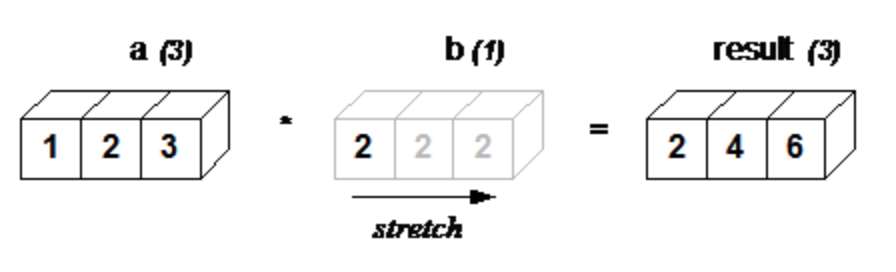

In [0]:
Image('/content/1_0.png', width=500)

In [0]:
(mat1 * mat2).eval()
'''
브로드 캐스팅을 실제 계산도 각 자리까지 +, -, * 한다.
|1, 2| |10, 10| -> |1 * 10| |2 * 10| -> |10, 20|
|3, 4| |20, 20| -> |3 * 20| |4 * 20| -> |60, 80|
'''

'\n브로드 캐스팅을 실제 계산도 각 자리까지 +, -, * 한다.\n|1, 2| |10, 10| -> |1 * 10| |2 * 10| -> |10, 20|\n|3, 4| |20, 20| -> |3 * 20| |4 * 20| -> |60, 80|\n'

In [0]:
(mat1 * mat2).eval()

array([[10., 20.],
       [60., 80.]], dtype=float32)

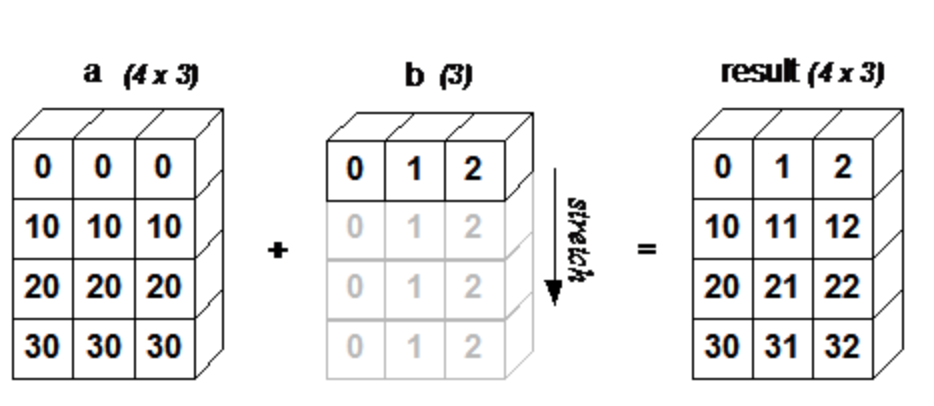

In [0]:
Image('/content/1_1.png', width=500)

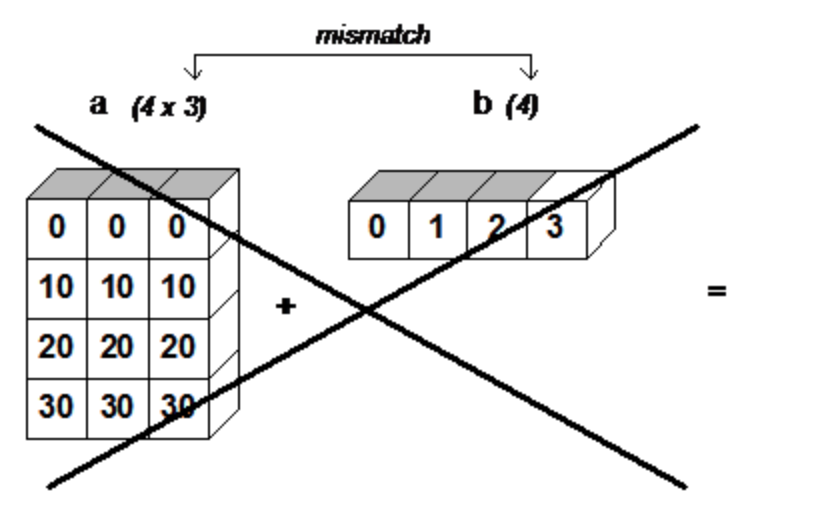

In [0]:
# 행이나 열을 늘릴 수는 있으나, 줄일 수는 없다.(룰)
Image('/content/1_2.png', width=500)

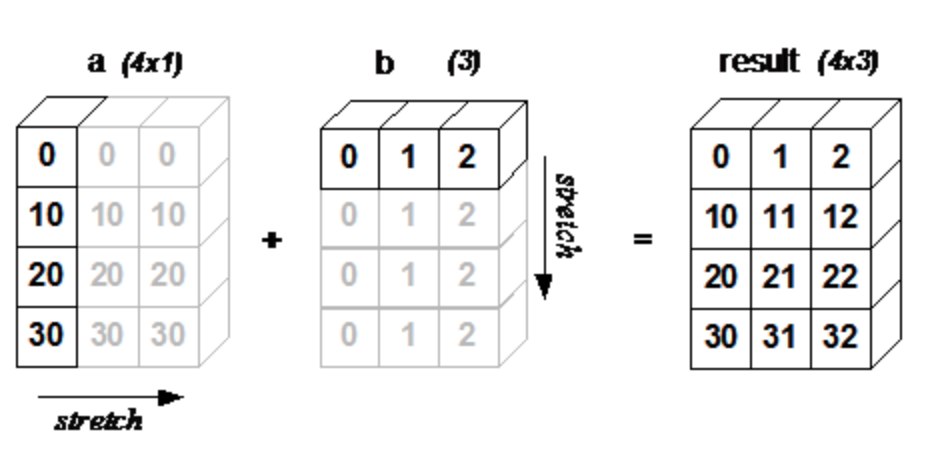

In [0]:
# 각자 확장해서 연산 가능
Image('/content/1_3.png', width=500)

In [42]:
m3 = tf.constant( [ [1., 2.], [3., 4.] ] )
m4 = tf.constant( [ [10.] ] )
# 가로, 세로를 다 늘려서 처리했다
(m3+m4).eval()

array([[11., 12.],
       [13., 14.]], dtype=float32)

In [0]:
sess.close()